# Il modulo `sklearn`

Framework basato su `numpy` (compatibile con `pandas`, `matplotlib` e `seaborn`) che permette di "allenare" e testare modelli per **machine learning**. Alcuni di questi modelli sono

* regressione (lineare e con *feature transformation*);
* alberi decisionali e *random forest*
* clustering ($k$-means, clustering gerarchico, ...)
* reti neurali (non *deep*, ma *shallow*)
* ...

Vi mostrerò qualcuno (due o tre) di questi modelli oltre che introdure la *pipeline* di utilizzo

    Dati -> Pre-proc -> Training -> Testing

**Attenzione** Sebbene `sklearn` contenga il codice per utilizzare *reti neurali*, non va utilizzato per *deep learning*. Per quello ci sono altre librerie (`opencv`, `tensorflow`, ...) di cui, purtroppo, non ho tempo di occuparmi in questo ciclo di seminari.



In [1]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)

In [2]:
df = data.frame

In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Vediamo come sono distribuite le 3 classi (tipologie di vigna) che sono indicate con interi `0,1,2`

In [5]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

## Un po' di "teoria" sul *machine learning*
Ci sono tre tipi principali di tecniche di machine learning:

* **supervised** learning
* **unsupervised** learning
* **reinforcement** learning

Tempo permettendo, vedremo esempi del primo e del secondo tipo. 

L'idea è che i dati contengono le informazioni, ma imparare troppo bene i dati può essere un problema (**overfitting**). Si può mostrare matematicamente che, nella maggior parte dei casi, i dati usati nel *training* devono essere diversi da quelli usati nel *testing*

### Passo 0: scelta di $X$ e $Y$
Una volta che abbiamo un dataset dobbiamo decidere quale saranno i **predittori** (o *feature*) $x_1,x_2,\ldots,x_m$ e quale (quali) sarà (saranno) le (le) varaibile (variabili) dipendenti o **target** $y_1,\ldots,y_p$.

Nell'esempio che stiamo usando la colonna `target` rappresenta la classe da identificare (predire) quindi la $y$, le restanti colonne costituiscono le colonne della *matrice* $X$. Per costruire queste due variabili

1. seleziono la colonna `target`
2. elimino la stessa colonna `target`

Ricordiamo che le operazioni di `pandas` di default non esegui "in-place" le operazioni, quindi le istruzioni sotto **non** modificano `df`, ma creano nuovi frame.

In [6]:
Y = df["target"]
X = df.drop(["target"], axis=1)

Controlliamo che `target` sia effettivamente assente da $X$

In [7]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

### Passo 1: split train e test
Operazione talmente frquente che in `sklearn` ci sono metodi apposta, vediamo il tipico caso in cui un 80% casuale dei dati si usa per il training ed il restante 20% per il testing.

* Più campioni si uasno per il training meglio sarà il modello ma...
* ...meno campioni si usano per il testing meno sarà affidabile la stima dell'errore.

Importante
$$ X_{train} \cap X_{test} = \emptyset $$
così funziona `train_test_split`.

Il modulo `sklearn` prevede una funzione apposita `train_test_split` che accetta un numero qualsiasi di parametri posizionali (nell'esempio sotto 2: `X` e `Y`) e diversi parametri nominali di cui ci interessano:

* `test_size` dice la proporzione (frazione) di dati da usare come *test set* (`1-test_size` sarà la proporzione di *train set*

* `random_state` un *seed* casuale che inizializza il generatore di numeri casuali (ogni volta che usa lo stesso *seed* si ottiene la stessa sequenza pseudo-casuale)

* `shuflle` indica che la scelta deve avvenire in maniera casuale (utile quando, come nel nostro esempio, i dati non sono casuali, prima tutti con classe `0`, poi classe `1`, ...)

**Attenzione** I parametri posizionali (es. `X` e `Y`) devono avere lo stesso numero di righe altrimenti verrè generato un errore.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)

In [10]:
print(X_train.shape)
print(X.shape)

(142, 13)
(178, 13)


### Passo 2: Training

1. Si sceglie che modello usare: regressione, *decision tree*, *neural network*, ...
2. Si crea un modello **usando solo il training set**
3. Si misura la bontà del modello facendo predizione sul test set

#### Decision Tree e Random Forest

In [12]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier # classificazione

In [13]:
albero_dec = tree.DecisionTreeClassifier() # crea un'istanza del modello...
albero_dec.fit(X_train, y_train) # ...allena il modello

DecisionTreeClassifier()

**Attenzione** quando si crea il modello questo non viene allenato, per questa fase bisogna chiamare il metodo `fit` che si aspetta di avere in input il training set.

**Attenzione** il metodo `fit` modifica lo stato interno dell'oggetto su cui viene chiamata, dopo la sua chiamata infatti il modello è allenato ed è possibile chiamare `predict` (vedi sotto)

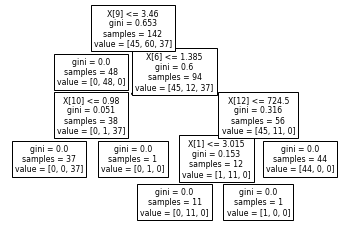

In [15]:
# vediamo il risultato (usa matplotlib)
import matplotlib.pyplot as plt
tree.plot_tree(albero_dec)
plt.savefig("tree.pdf") # salva il file

Quando il modello è allenato possiamo fare delle predizioni con il metodo `predict`

In [16]:
y_pred = albero_dec.predict(X_test)

Per sapere come è andata la predizione possiamo usare una delle metriche messe a disposizione da `sklearn`. In questo caso usaimo `accuracy_score` che ci dice la proporzione di predizioni corrette

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9166666666666666

Il nostro albero decisionale raggiunge un'accuratezza del $96\%$

#### Random Forest
Un singolo albero può non produrre il risultato migliore, inoltre gli alberi sono influenzati (cambiano molto) sulla base dell'ordine in cui vengono considerati i campioni in ingresso (le righe di $X$).

Una *random forest* è una collezione di alberi decisionali che sono, in generale diversi. Per fare predizione si fa "votare" ogni singolo albero per una classe e si decide per la classe che ha preso il maggior numero di voti.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


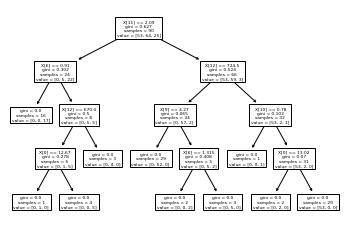

In [ ]:
import matplotlib.pyplot as plt
trees = rf.estimators_
for i in range(len(trees)):
    tree.plot_tree(trees[i])
    plt.savefig(f"tree{i}.pdf")


#### Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X_train)

print(accuracy_score(y_pred, y_train))

0.176056338028169


#### Diversivo: bash
Jupyter permette di eseguire comani `bash` utilizzando il prefisso `!`

In [20]:
!rm tree*

In [21]:
!which bash

/bin/bash


In [22]:
!pwd

/usr/src/app/src/school/python/AS_2021_22/SdI


#### $k$-Nearest Neighbour ($k$-NN)
Un altro modello di classificazione è $k$-Nearest Neighbor in cui si guarda ai $k$ punti del training set che sono i più vicini al punto da predire, ognuno di questi viene considerato e "fatto votare" per una classe. La scelta ricade sulla classe con il maggior numero di voti.

Il codice sotto prova tutti i $k$ da `3` a 99 e poi stampa un grafico con l'accuratezza per ognuno di questi $k$.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
for k in range(3,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
print(accuracies)

[0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.75, 0.6944444444444444, 0.6111111111111112, 0.6388888888888888, 0.6388888888888888, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.6666666666666666, 0.6111111111111112, 0.5833333333333334, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.69444444444

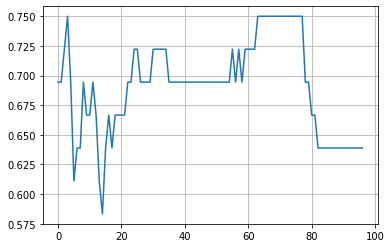

In [ ]:
plt.plot(accuracies)
plt.grid(True)